In [1]:
import sys
import numpy as np
import os
sys.path.append(os.path.expanduser("~/git/machine_learning/src"))
import importlib
import models
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
import structure_predictor as sp

2023-09-06 15:32:29.752686: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-09-06 15:32:29.788874: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data_dir = os.path.expanduser("~m2d/git/analysis_playground/ml/data/training_data")

pars = np.load(os.path.join(data_dir, "orhs2-pars_pars.npy"))
refl = np.load(os.path.join(data_dir, "orhs2-pars_data.npy"))
q_values = np.load(os.path.join(data_dir, "orhs_q_values.npy"))

print(pars.shape)
print(refl.shape)
print(q_values.shape)

idx = 0
nset=1000000

(2000000, 7)
(2000000, 100)
(100,)


In [3]:
importlib.reload(sp)
idx+=1
predictor = sp.StructurePredictor(os.path.expanduser("~vogtdan000/git/machine_learning/src/settings.json"),2)
test_pars=[]
test_refl=[]

for i in range (100):
    if pars[i][5]>1:
        test_pars.append(pars[i])
        test_refl.append(refl[i])
test_refl=np.asarray([test_refl])
test_pars=np.asarray([test_pars])
predicted_layers, predicted_pars = predictor.predict([refl[100:125]])

real_parameters = predictor.rescale_real_pars(pars[100:125],2)

for i in range (len(predicted_pars)):
    if real_parameters[i][4]>1:
        print ("Predicted: %s" %predicted_pars[i])
        print ("Real: %s" %real_parameters[i])
        print("")

1/1 [==============================] - 0s 16ms/step
Predicted: [11.763956904411316, -0.4741840362548828, 774.3673792481422, 46.47868812084198, 4.13418185710907, 886.1246943473816, 44.98533695936203]
Real: [9.14537505082082, -0.6485389560478412, 806.9588221429703, 44.374603280317395, 3.858002201321245, 856.156685841003, 45.19547520786289]

Predicted: [24.649695217609406, 5.462620973587036, 537.4392312765121, 21.527321338653564]
Real: [27.184773797857453, 1.069062803191163, 676.2576595740911, 27.500352519230145, 5.398474508977148, 540.3624360709196, 20.132991846172857]

Predicted: [12.810638308525085, 5.831387042999268, 822.8962132334709, 48.191986083984375, 5.722009181976318, 727.540722489357, 45.14626204967499]
Real: [11.897375693004964, 5.646799015642043, 754.8373738336196, 59.248633384735825, 6.109701718918273, 788.5187715823577, 45.27523630427389]

Predicted: [17.227548744529486, 0.5296409130096436, 94.23094362020493, 47.50987470149994, 6.2024312019348145, 437.61828914284706, 36.392

1/1 [==============================] - 0s 48ms/step
 0 3.417   0.480   556.091  22.467 
*1 7.185   -0.785  515.606  25.314  1.463   766.973  48.816 
 2 6.398   -0.175  373.261  32.911  1.177   401.448  38.720  1.459   497.993  46.165 
 3 6.231   -0.065  278.502  37.742  1.044   294.096  28.933  1.548   291.482  37.067  1.607   386.051  46.974 

6.473   -0.706  551.642  25.847  1.709   653.460  49.643 


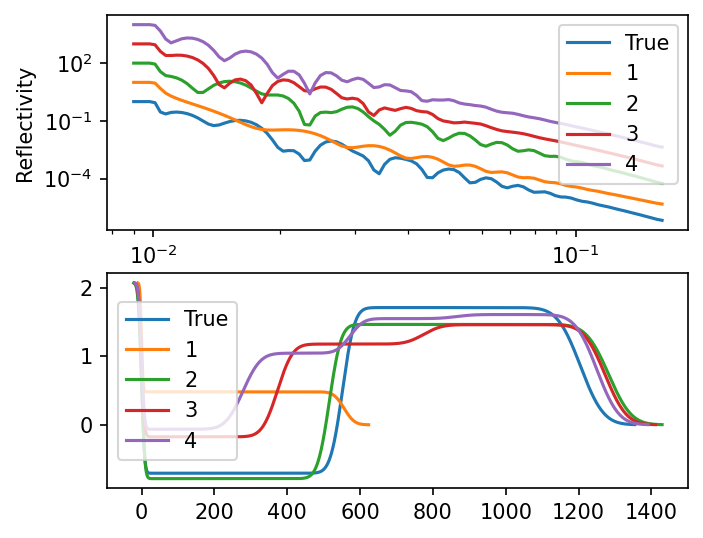

In [14]:
importlib.reload(sp)
idx+=1
predictor = sp.StructurePredictor(os.path.expanduser("~vogtdan000/git/machine_learning/src/settings.json"),2)
number_of_layers, predicted_pars = predictor.big_predict([[refl[idx]]])

#print(predicted_pars)
real_parameters = predictor.rescale_real_pars([pars[idx]],2) 
#print(real_parameters)
fig, ax = plt.subplots(2, 1, dpi=150, figsize=(5, 4.1))
q, r, z, sld = sp.calculate_reflectivity(q_values, real_parameters[0])

plt.subplot(2,1,1)
plt.plot(q_values, r, label='True')
plt.subplot(2,1,2)
plt.plot(z, sld, label='True')
for i in range(len(predicted_pars)):
    label = '*' if i == number_of_layers[0]-1 else ' '
    par_str = ' '.join(['%-6.3f ' % p for p in predicted_pars[i]])
    print('%s%s %s' % (label, i, par_str))
    q, r, z, sld = sp.calculate_reflectivity(q_values, predicted_pars[i])
    plt.subplot(2,1,1)
    plt.plot(q_values, r*10**(i+1), label= str(i+1))
    plt.subplot(2,1,2)
    plt.plot(z, sld, label=str(i+1))

print()

plt.subplot(2,1,1)
plt.xlabel('Q ($1/\AA$)', fontsize=10)
plt.ylabel('Reflectivity', fontsize=10)
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.subplot(2,1,2)
plt.legend()
print(' '.join(['%-6.3f ' % p for p in real_parameters[0]]))

